dataset: https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
import pandas as pd

In [3]:
rotten_tomatoes_critic_reviews = pd.read_csv('rotten_tomatoes-datasets/rotten_tomatoes_critic_reviews.csv')
rotten_tomatoes_critic_reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [4]:
df = rotten_tomatoes_critic_reviews[["review_type", "review_content"]]
df.head()

,review_type,review_content
0,Fresh,A fantasy adventure that fuses Greek mythology...
1,Fresh,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,Fresh,With a top-notch cast and dazzling special eff...
3,Fresh,Whether audiences will get behind The Lightnin...
4,Rotten,What's really lacking in The Lightning Thief i...


In [5]:
df.loc[df['review_type'] == 'Fresh', 'label'] = 1 
df.loc[df['review_type'] == 'Rotten', 'label'] = 0  

# Remove NaNs

In [6]:
df.isna().sum()

review_type           0
review_content    65806
label                 0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

review_type       0
review_content    0
label             0
dtype: int64

# Display Data

In [9]:
import seaborn as sns

Text(0.5, 1.0, 'Dataframe count of Fresh vs. Rotten Reviews')

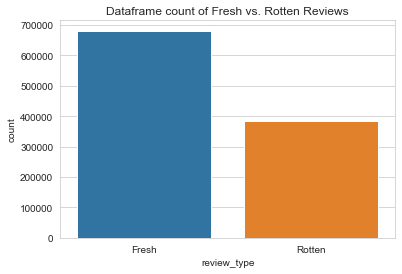

In [10]:
sns.set_style("whitegrid")
sns.countplot(df.review_type).set_title("Dataframe count of Fresh vs. Rotten Reviews")

In [11]:
df = df.drop('review_type', 1)
df.head()

,review_content,label
0,A fantasy adventure that fuses Greek mythology...,1.0
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1.0
2,With a top-notch cast and dazzling special eff...,1.0
3,Whether audiences will get behind The Lightnin...,1.0
4,What's really lacking in The Lightning Thief i...,0.0


# Clean Text

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re, string, unicodedata
from bs4 import BeautifulSoup
from string import punctuation

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoneev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# List of default stopwords
stop = set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
# List of default punctuations
punctuation = list(string.punctuation)
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [15]:
stop.update(punctuation)

In [16]:
# Strip HTML
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing Punctuations appended to strings
def remove_punctuation_attached_to_strings(text):
    return re.sub(r'[^\w\s]', '', text)

# Removing URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords and punctuation from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_punctuation_attached_to_strings(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text

In [17]:
df

,review_content,label
0,A fantasy adventure that fuses Greek mythology...,1.0
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1.0
2,With a top-notch cast and dazzling special eff...,1.0
3,Whether audiences will get behind The Lightnin...,1.0
4,What's really lacking in The Lightning Thief i...,0.0
...,...,...
1130008,A rousing reconstruction of the 1879 Battle of...,1.0
1130013,"Seen today, it's not only a startling indictme...",1.0
1130014,A rousing visual spectacle that's a prequel of...,1.0
1130015,"A simple two-act story: Prelude to war, and th...",0.0


In [18]:
df.loc[0,'review_content']

'A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will thrill to the visual spectacle'

In [19]:
# Apply function on text column
df['review_content'] = df['review_content'].str.lower()
df['review_content_clean'] = df['review_content'].apply(denoise_text)

In [20]:
df

,review_content,label,review_content_clean
0,a fantasy adventure that fuses greek mythology...,1.0,fantasy adventure fuses greek mythology contem...
1,"uma thurman as medusa, the gorgon with a coiff...",1.0,uma thurman medusa gorgon coiffure writhing sn...
2,with a top-notch cast and dazzling special eff...,1.0,topnotch cast dazzling special effects tide te...
3,whether audiences will get behind the lightnin...,1.0,whether audiences get behind lightning thief h...
4,what's really lacking in the lightning thief i...,0.0,whats really lacking lightning thief genuine s...
...,...,...,...
1130008,a rousing reconstruction of the 1879 battle of...,1.0,rousing reconstruction 1879 battle rorkes drift
1130013,"seen today, it's not only a startling indictme...",1.0,seen today startling indictment british imperi...
1130014,a rousing visual spectacle that's a prequel of...,1.0,rousing visual spectacle thats prequel cy endf...
1130015,"a simple two-act story: prelude to war, and th...",0.0,simple twoact story prelude war war former con...


In [21]:
df.loc[0,'review_content_clean']

'fantasy adventure fuses greek mythology contemporary american places values anyone around 15 give take couple years thrill visual spectacle'

# Most Common Words 

In [22]:
from collections import Counter

In [23]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

In [24]:
corpus = get_corpus(df.review_content_clean)
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'film': 159620,
 'movie': 120069,
 'one': 85247,
 'like': 71845,
 'story': 57313,
 'much': 44737,
 'good': 43463,
 'even': 43387,
 'films': 36884,
 'time': 35755}

# N-Gram

In [27]:
import matplotlib.pyplot as plt

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

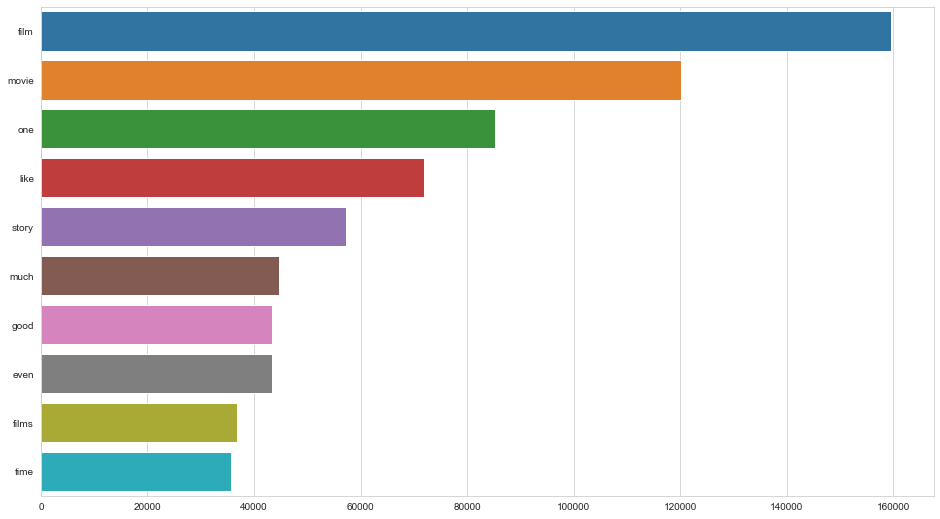

In [30]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.review_content_clean,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()),y = list(most_common_uni.keys()))

<AxesSubplot:>

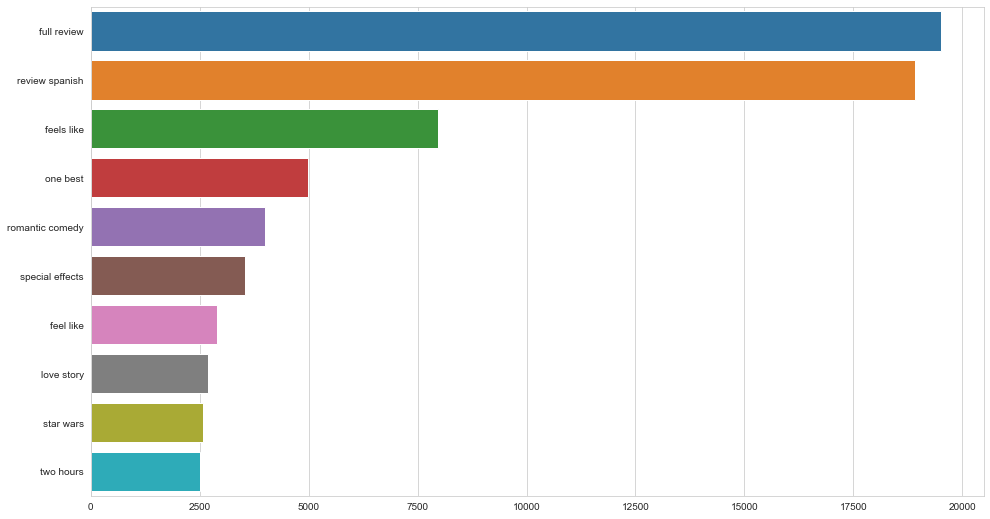

In [31]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.review_content_clean,10,2)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()),y = list(most_common_uni.keys()))

<AxesSubplot:>

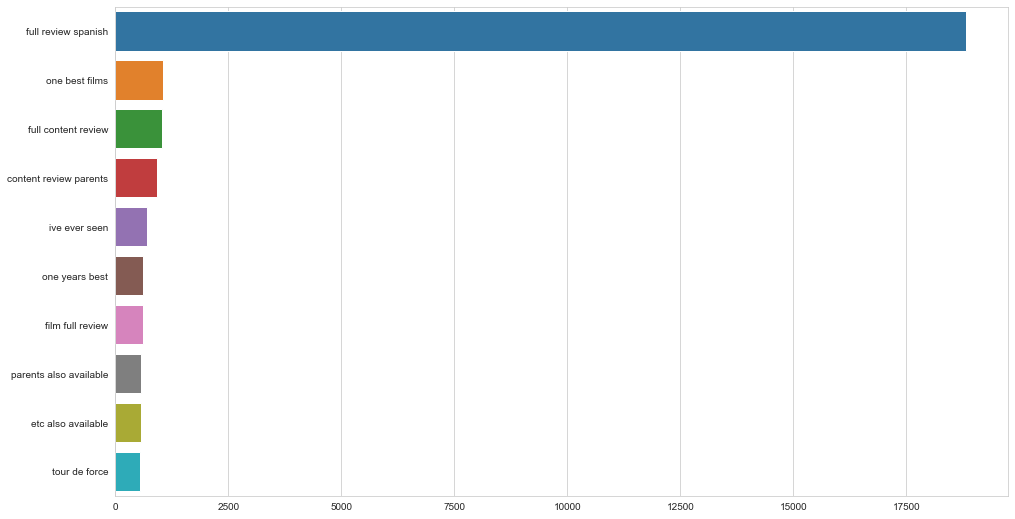

In [32]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.review_content_clean,10,3)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()),y = list(most_common_uni.keys()))

# Word Cloud

In [39]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 1.1 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158534 sha256=f0b15a029d48df61ffc907eb2ee44daaa14005243f0c3ee2f99bc3f603c3cffb
  Stored in directory: /Users/antoneev/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
You should consider upgrading via the '/Users/antoneev/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

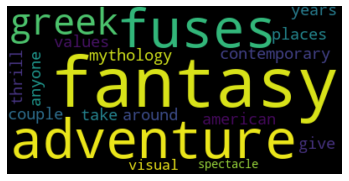

In [45]:
# Start with one review:
text = df.review_content_clean[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Split Dataset

In [33]:
df = df.drop('review_content', 1)
df.head()

,label,review_content_clean
0,1.0,fantasy adventure fuses greek mythology contem...
1,1.0,uma thurman medusa gorgon coiffure writhing sn...
2,1.0,topnotch cast dazzling special effects tide te...
3,1.0,whether audiences get behind lightning thief h...
4,0.0,whats really lacking lightning thief genuine s...


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df.review_content_clean, df.label, test_size=0.30)

In [36]:
print('Train Content', x_train.count())
print('Train Labels', y_train.count())
print('Test Content', x_test.count())
print('Test Labels', y_test.count())

Train Content 744947
Train Labels 744947
Test Content 319264
Test Labels 319264
